- - - -
# Mechpy Tutorials
a mechanical engineering toolbox

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/web/  

- - - -

Neal Gordon  
2017-02-20  

- - - -



## Mechanical Design Notes and code 


## Python Initilaization with module imports

In [1]:
# setup 
import numpy as np
import sympy as sp
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

#get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

In [6]:
pwd

'/home/neal/Desktop/mechpy'

In [5]:
import mechpy

In [4]:
import os ; os.chdir('..')  # change to root from the examples folder

In [7]:
from mechpy.design import fastened_joint

# Materials
[index](#Mechpy)

## Stress and Strain
Stress is a tensor that can be broken into 

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz}\\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz}\\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{bmatrix} 
$$



## Factors of safety
In aerospace, typically 1.2 for civilian aircraft and 1.15 for military

$$FS=\frac{\sigma_{yield}}{\sigma}-1$$  

## Fastener Notes and Formulas

Finding the centroid of a bolt with coordinates, $\overline{x},\overline{y}$
$$ \overline{x}=\frac{\sum_{i=1}^{n_b}{A_i x_i} }{\sum_{i=1}^{n_b}{A_i} } \ \ \overline{y}=\frac{\sum_{i=1}^{n_b}{A_i y_i} }{\sum_{i=1}^{n_b}{A_i}}$$

Joint/Polar Moment of Inertia, $r=$ distance from centroid to fastener
$$J= \int{r^2dA}= \sum_{i=1}^{n_b}{A_k r_k^2}$$

Bearing Stress on a bolt
$$\sigma^i_{bearing}=\frac{V_{max}}{Dt}$$

Shear Stress on each bolt i due to shear force
$$\tau_f^i = \frac{P}{\sum_{i=1}^{n_b}{A_i} }$$  
Where $A_i=$ the area of ith bolt, $n_b=$number of bolts, and $P=$ shear force

Shear Stress on each bolt i due to moment
$$\tau_t^i = \frac{T r_i}{J} $$  

### Modes of failure of fastened Joints
1. Tensile Plate Failure across the net section between rivets/bolts
2. Failure of rivets through shear
3. Compression failure between rivet and plate
4. Edge shear-out at rivet hole
5. Edge tearing at rivet hole

#### 1.

$$\sigma_t =\frac{F_s}{(b-nd)t}$$

#### 2.

#### 3.

#### 4.

#### 5.



## Adhesive Joints

With members, or adherends, joined with adhesives, either the member will fail due to tensile loads or the adhesive will fail in shear.

The simple solution to finding the stress of bonded surfaces is taking the average stress
$$\tau_{avg}=\frac{P}{bL}$$, is not an accurate way to model maximum stress. A good rule of thumb based on the calculations below is 
$$\tau_{max}=2.08\tau_{avg}$$

The maximum shearing stress of an adhesive layer, $\tau_{max}$, can be computed as 
$$\tau_{max}=K_s\tau_{avg}=K_s\left(\frac{P}{bL_L}\right)$$
with $P$ as applied load, $b$ as the width ofthe adhesive layer, and $L_L$ as the length ofthe adhesive layer. The stress distribution factor, $K_s$, can be defined as $K_s=\frac{cL}{tanh(CL/2)}$ where $c=\sqrt{\frac{2G_a}{Et_mt_a}}$, where the shear modulus, $G_a=\frac{\tau}{\gamma}$, and $E$ as the modulus of elasticity.


The max shearing stress, $\tau_{max}$ in a scarf joint can be found with 
$$\tau_{max}=K_s\tau_{avg}=K_s\left[ \frac{Pcos\theta}{\left(\frac{bt}{sin\theta} \right)  } \right] = K_s\left(  \frac{P}{bt} sin\theta cos\theta \right)$$
where $t$ is the thickness of the adherend members and $\theta=tan^{-1}\frac{t}{L_s}$ is the scarf angle

*Mechanical Design of Machine Elements and Machines by Collins, Jack A., Busby, Henry R., Staab, George H. (2009)*

,Fastener,x,y,x^2,y^2,xbar,ybar
0,0,0,0,0,0,1.5,0.5
1,1,1,0,1,0,1.5,0.5
2,2,2,0,4,0,1.5,0.5
3,3,3,0,9,0,1.5,0.5
4,4,0,1,0,1,1.5,0.5
5,5,1,1,1,1,1.5,0.5
6,6,2,1,4,1,1.5,0.5
7,7,3,1,9,1,1.5,0.5


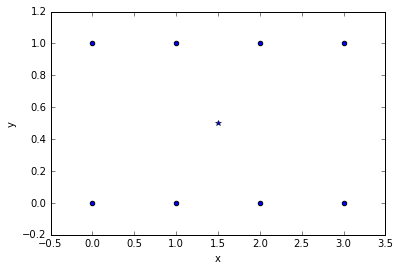

In [8]:
## Bolted Joint Example

# fastener Location
fx = [0,1,2,3,0,1,2,3]
fy = [0,0,0,0,1,1,1,1]
# Force magnitude(x,y)
P = [-300,-500]
# Force location
l = [2,1]
df = fastened_joint(fx, fy, P, l)

df.plot(kind='scatter', x='x', y='y');
#df.plot(style='o', x='x', y='y')
plt.plot(df.xbar[0],df.ybar[0],'*')
df
#ax = plt.gca()
#ax.arrow(l[0], l[1], Pnorm[0],Pnorm[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
#x.arrow(xbar, ybar, Pnorm[0],0, head_width=0.05, head_length=0.1, fc='k', ec='k')
#ax.arrow(xbar, ybar, 0,Pnorm[1], head_width=0.05, head_length=0.1, fc='k', ec='k')

# Design

## Factors of Safety

DLL, Design Limit Load = max force or moment expected during a mission with a given statistical probability  

Al, Allowable =  allowed minimum applied load or strength of a structure at a given statistical probablity  

FS, factor of safety [1, $\infty$] = a factor applied to a DLL to decrease the chance of failure, typically around 1-3  

KD, knockdown (0,1] = a percentage reduction of Allowable load to reduce the chance of failure

A KD=0.8 would be applied to the allowable to reduce it by 20%, $Al_{new}=Al_{old}*KD$   

MS, margin of safety = a measure of reserve strength , how much applied loda can increase before the safety of the vehicle is comprimised. $ MS\geq0$ for a good design, $MS=\frac{Allowable}{DLL*FS}-1$

For example with a $FS=1.15$, $DLL=80$, $Al=100$, we have a margin of $MS=\frac{100}{80*1.15}-1=\frac{100}{92}-1=0.087$ which is passing our design checks based on the expected max load of 80

Lets Assume a knockdown of 27%, so $K=1-0.27=0.73$  

$$
FS = \frac{1}{K}
$$


We can also say we have a $FS = \frac{1}{0.73}=1.3699$

$$
\sigma_{design}=\frac{\sigma_{ult}}{FS} = \sigma_{ult}*K
$$
